In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
import json
import sys
import os
import matplotlib
#matplotlib.use('Agg') 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import seaborn as sns
import pdb
#import ipdb
import h5py
import importlib
import pickle
import math

# Add root folder to sys path
sys.path.append("../")

from load_expert_traj import recursively_save_dict_contents_to_group

# %pylab inline
# inline doesn't give interactive plots
%matplotlib inline 
# %matplotlib notebook
plt.rcParams['figure.figsize'] = (6.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'Blues'

sns.set()

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Import own modules
# Need to use importlib since module starts with a numerical value.

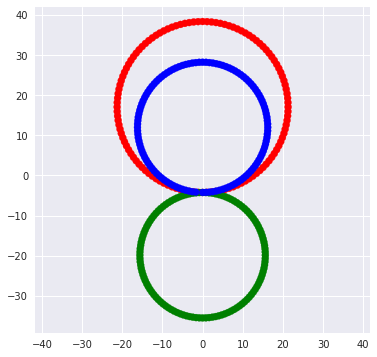

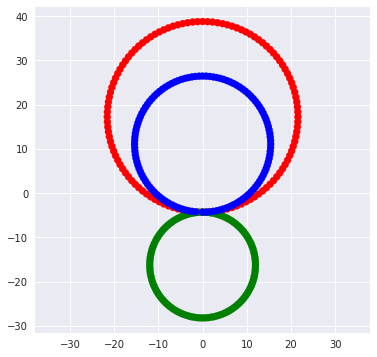

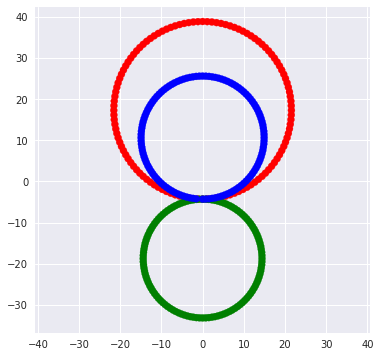

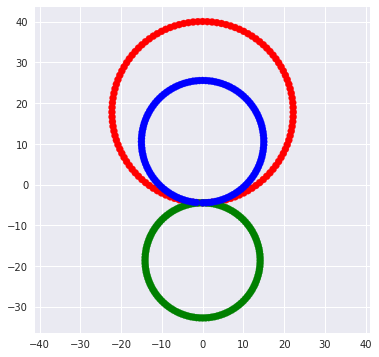

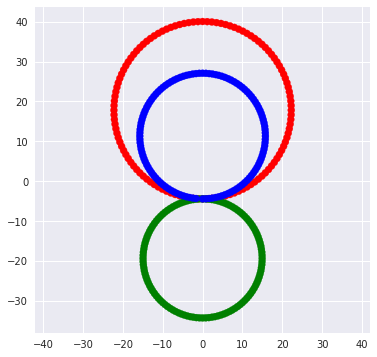

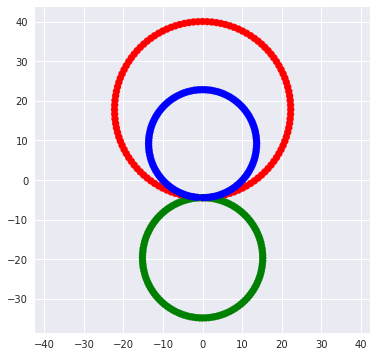

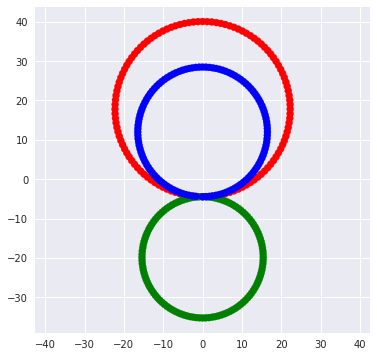

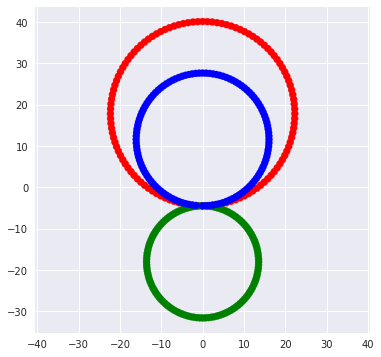

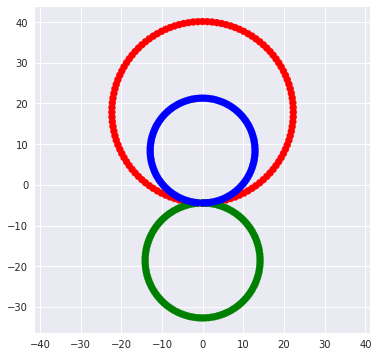

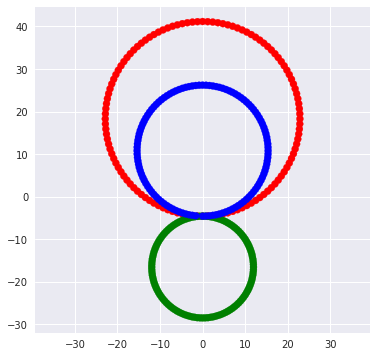

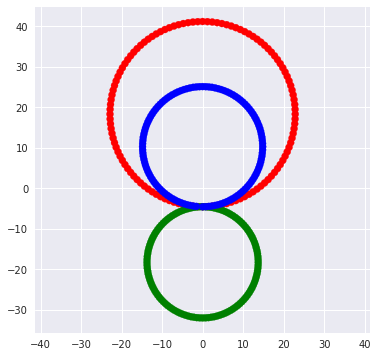

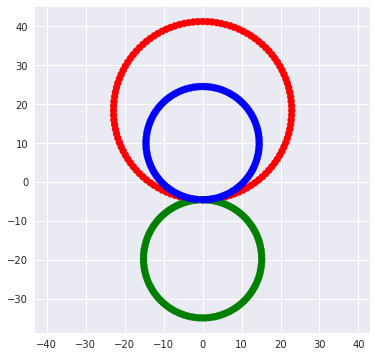

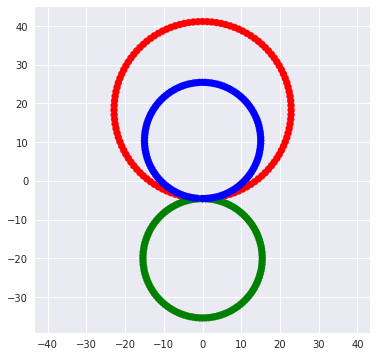

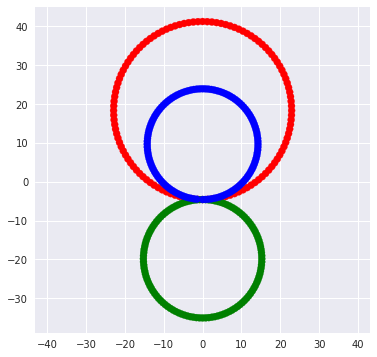

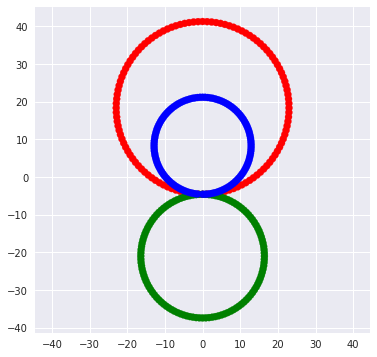

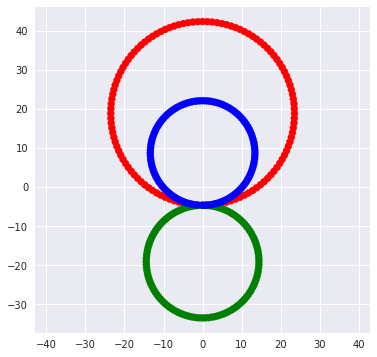

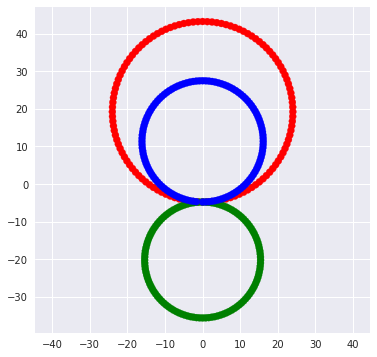

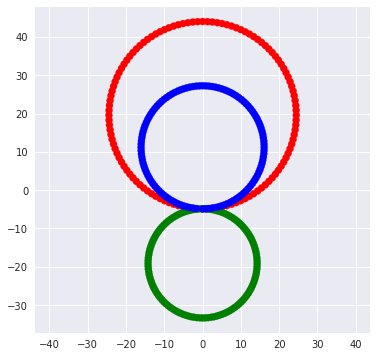

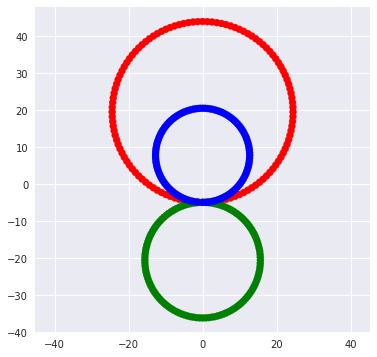

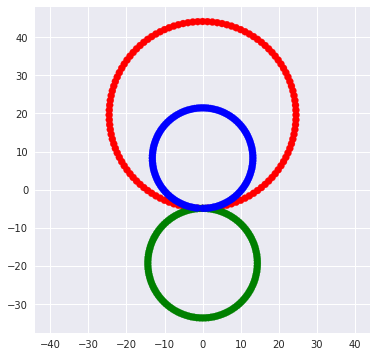

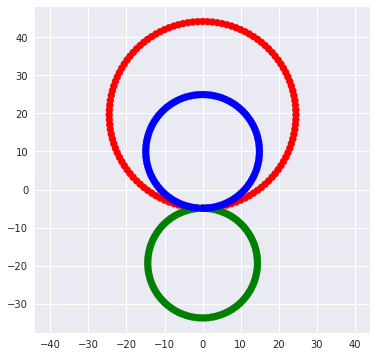

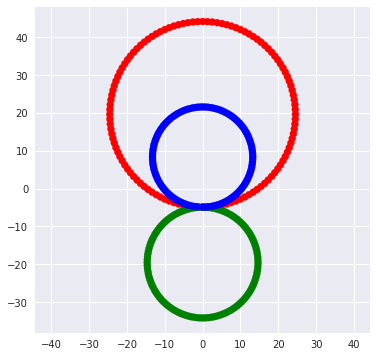

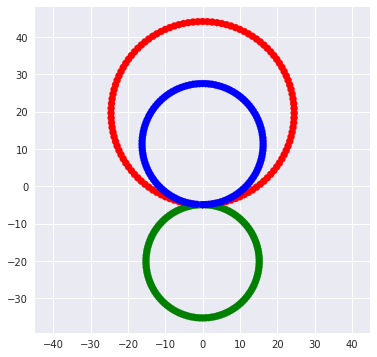

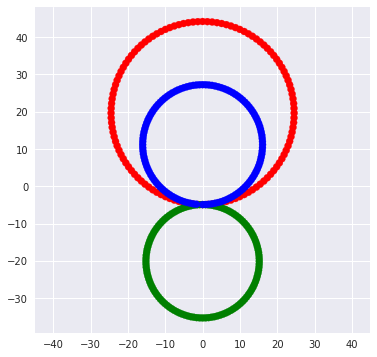

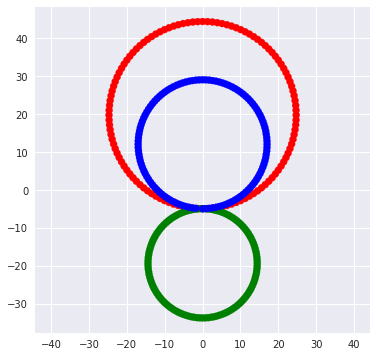

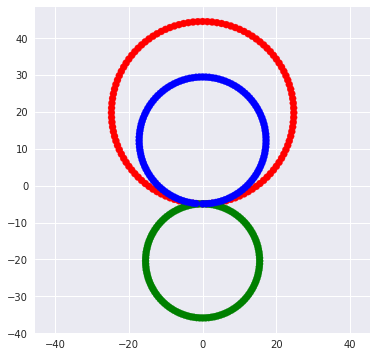

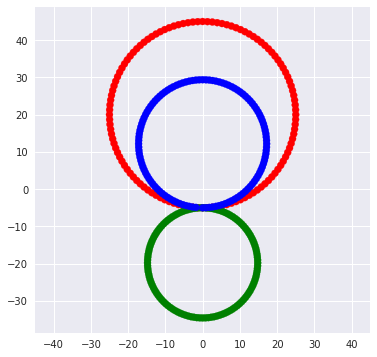

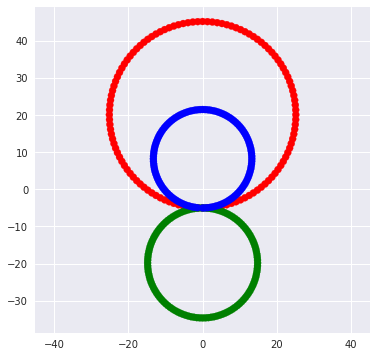

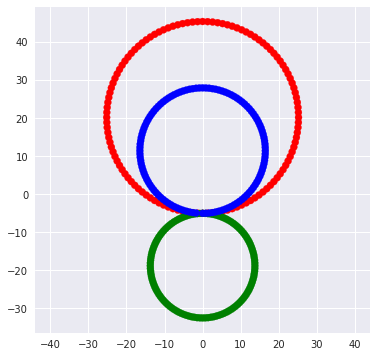

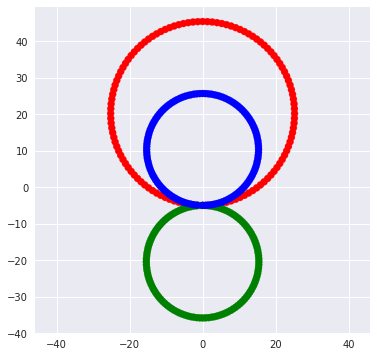

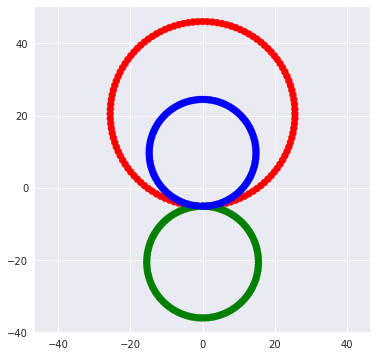

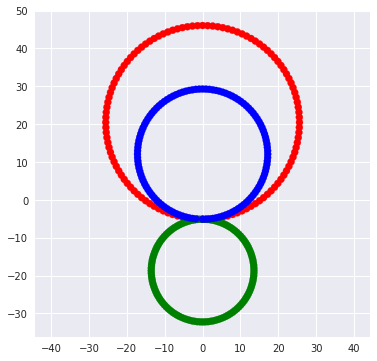

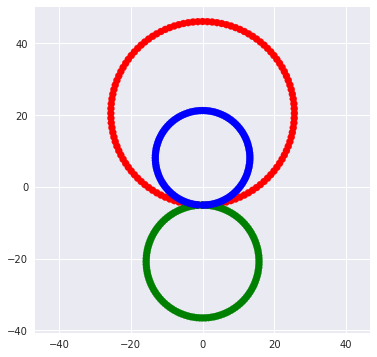

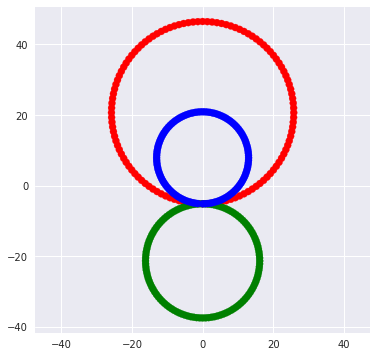

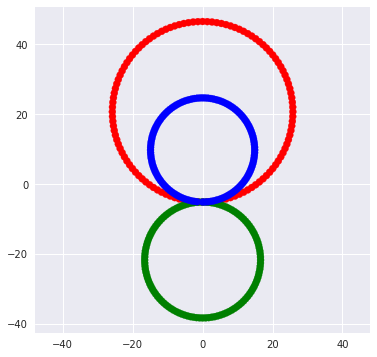

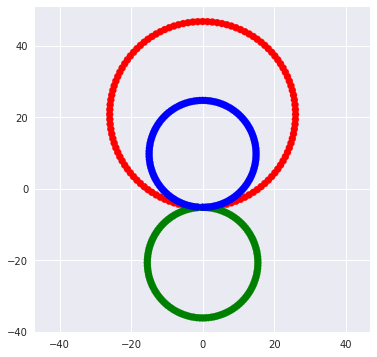

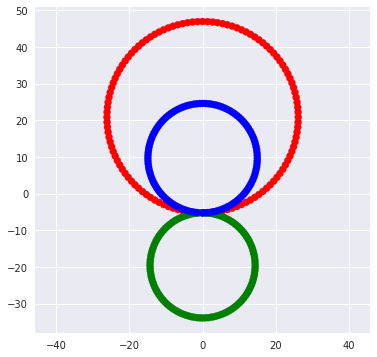

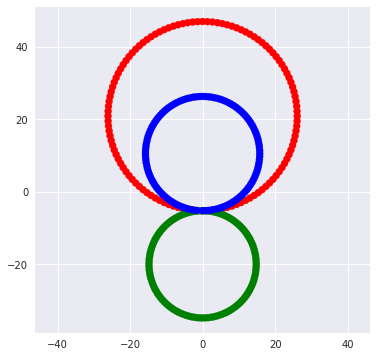

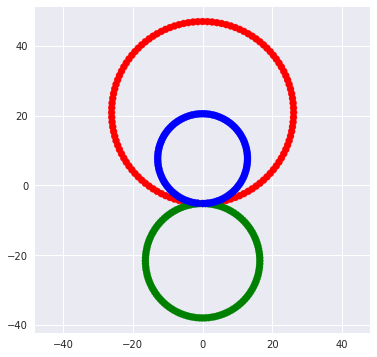

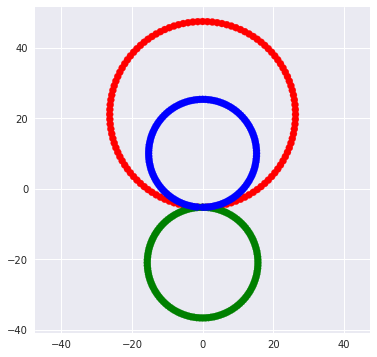

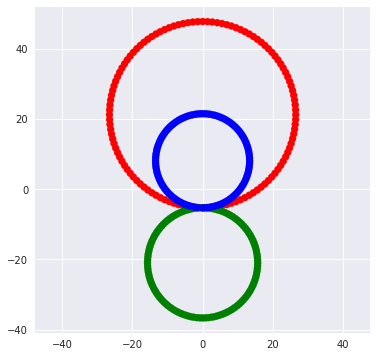

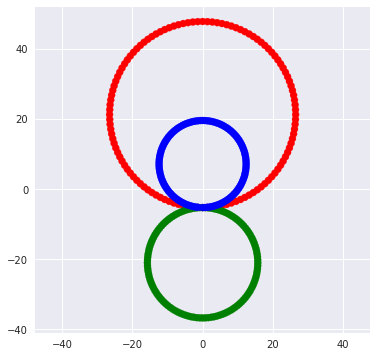

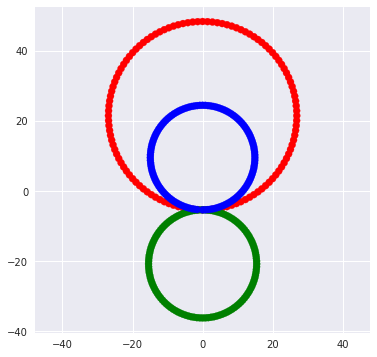

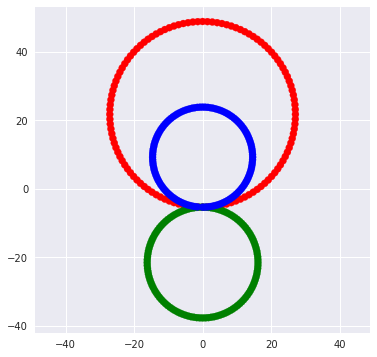

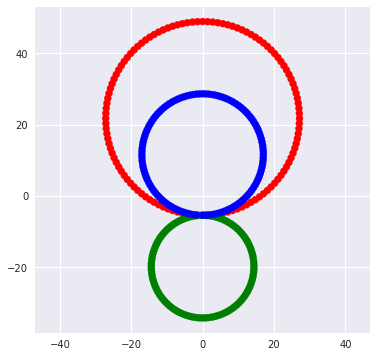

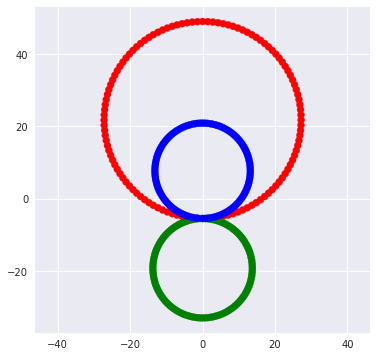

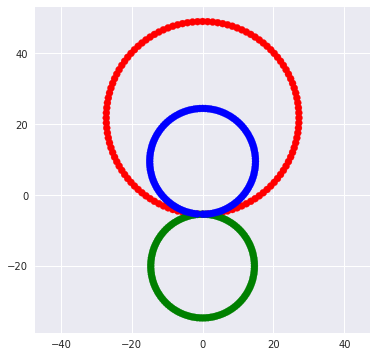

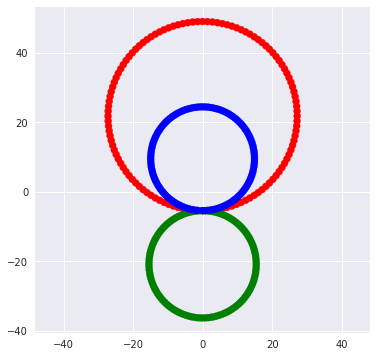

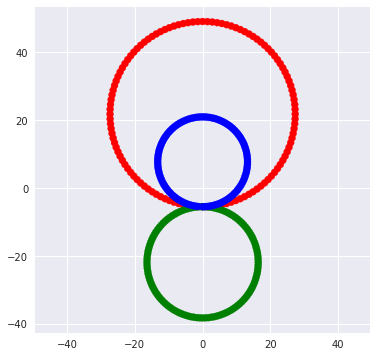

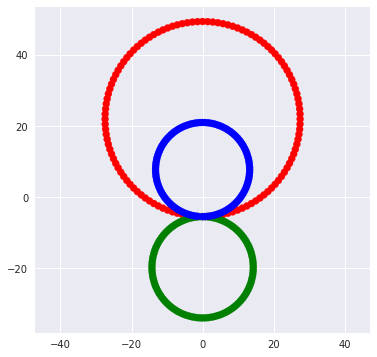

In [18]:
# h5_path = '../h5_trajs/circle_trajs/meta_1_traj_50_normalized_action/expert_traj.h5'
# h5_path = '../h5_trajs/circle_trajs/meta_2_traj_40_normalized_action/expert_traj.h5'
h5_path = '../h5_trajs/circle_trajs/meta_1_traj_50_normalized_action_fixed/expert_traj.h5'
# h5_path = '../h5_trajs/circle_trajs/meta_2_traj_40_fixed_initial_point/expert_traj.h5'
h5_f = h5py.File(h5_path, 'r')
for traj_key in h5_f['expert_traj'].keys():
    states = np.array(h5_f['expert_traj'][traj_key]['state'])
    action = np.array(h5_f['expert_traj'][traj_key]['action'])
    goal = np.array(h5_f['expert_traj'][traj_key]['goal'])
    if 'radius' in list(h5_f['expert_traj'][traj_key].keys()):
        radius = np.array(h5_f['expert_traj'][traj_key]['radius'])
    else:
        radius = None
    assert states.shape[0] == 359
    
    states_from_actions = [[states[0, 0], states[0, 1]]]
    for i in range(action.shape[0]):
        prev_state = states_from_actions[-1]
        radius_idx = i // 120
        if radius is not None:
            r = radius[radius_idx]
            dist = ((10 * np.pi) / 120.) * r
        else:
            dist = 1
        next_state = [prev_state[0] + action[i, 0] * dist,
                      prev_state[1] + action[i, 1] * dist]
        states_from_actions.append(next_state)
    state_from_action_arr = np.array(states_from_actions)
    
    colors = ['r'] * 120 + ['g'] * 120 + ['b'] * 119
    # plt.scatter(states[:, 0], states[:, 1], color=colors)
    plt.scatter(state_from_action_arr[:-1, 0].tolist(),
                state_from_action_arr[:-1, 1].tolist(),
                color=colors)
    plt.axis('equal')    
    plt.show()

h5_f.close()